# Teste de Hipótese para a Média (uma variável)

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [2]:
import pandas as pd
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns



In [10]:
df = pd.read_csv(r'C:\Users\ktmoi\OneDrive\Área de Trabalho\Master of Data\Arquivos\ideb.csv')

In [11]:
df = df.loc[:,["ano","sigla_uf","taxa_aprovacao", "nota_saeb_matematica","nota_saeb_lingua_portuguesa","ideb"]]
display(df)

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,64.1,161.80,150.80,2.4
1,2005,AC,53.9,167.80,165.60,2.3
2,2005,AC,49.3,151.80,149.60,1.8
3,2005,AC,48.8,163.60,155.80,1.9
4,2005,AC,48.8,159.00,153.39,1.9
...,...,...,...,...,...,...
130189,2019,SP,97.1,253.44,225.44,6.7
130190,2019,SP,97.4,246.38,231.63,6.7
130191,2019,SP,97.4,246.38,231.63,6.7
130192,2019,SP,99.6,245.08,227.11,6.7


### Atividade 2: Verifique quantas linhas e colunas possui esse dataframe. Veja também se há dados faltantes.

In [12]:
df.shape

(130194, 6)

In [13]:
df_sem_nulos = df.dropna()

In [14]:
df_sem_nulos.isnull().sum()

ano                            0
sigla_uf                       0
taxa_aprovacao                 0
nota_saeb_matematica           0
nota_saeb_lingua_portuguesa    0
ideb                           0
dtype: int64

### Atividade 3: Teste a hipótese de a média da taxa de aprovação para o ano de 2005 ser igual a 78. Considere um nível de confiança de 95%.

Descreva, sucintamente, o resultado do teste de hipótese. Não esqueça de incluir as estatísticas encontradas.

Dica: crie um DataFrame somente com os valores do ano e da variável de interesse.


In [7]:
df2005 = df_sem_nulos[df_sem_nulos['ano'] == 2005]
display(df2005)

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,64.1,161.80,150.80,2.4
1,2005,AC,53.9,167.80,165.60,2.3
2,2005,AC,49.3,151.80,149.60,1.8
3,2005,AC,48.8,163.60,155.80,1.9
4,2005,AC,48.8,159.00,153.39,1.9
...,...,...,...,...,...,...
124027,2005,SP,96.2,218.00,210.39,5.7
124028,2005,SP,94.3,228.80,205.00,5.7
124029,2005,SP,94.3,228.80,205.00,5.7
128816,2005,SP,100.0,244.19,226.39,6.7


In [8]:
ttest_1samp(a=df2005['taxa_aprovacao'], popmean=78, alternative='two-sided')

TtestResult(statistic=20.890080427394643, pvalue=3.1469508067020596e-95, df=12082)

A Média não é igual a 78

# Teste de Hipótese para a Média (duas variáveis independentes)

Agora vamos aplicar um teste de hipótese para a média de duas populações independentes usando dados reais. Desejamos saber se a média para ambas é a mesma.

### Atividade 4: Teste a hipótese de a média do IDEB para os estados do Rio Grande do Sul e do Ceará, no ano de 2019, serem iguais. Considere um nível de confiança de 95%

Dica: Primeiro crie um dataframe auxiliar contendo apenas os dados referentes a 2019. Depois selecione dois conjunto de valores de IDEB, um apenas para o estado do Rio Grande do Sul e outro apenas para o estado do Ceará.

In [9]:
df_RS = df_sem_nulos[(df_sem_nulos['ano'] == 2019) & (df_sem_nulos['sigla_uf'] == 'RS')]
df_CE = df_sem_nulos[(df_sem_nulos['ano'] == 2019) & (df_sem_nulos['sigla_uf'] == 'CE')]

In [10]:
ttest_ind(df_RS['ideb'],
          df_CE['ideb'])

Ttest_indResult(statistic=-4.3200508719663135, pvalue=1.6632800256873896e-05)

In [11]:
df_RS['ideb'].mean()

6.1588182632050135

In [12]:
df_CE['ideb'].mean()

6.356836461126006

Como o p-valor é menor que 0,05 podemos rejeitar a hipotese nula, isto é, podemos afirmar com 95% de confiança que a média dos estados CE e RS no ano de 2019, não são iguais.

### Atividade 5: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB dos dois estados.

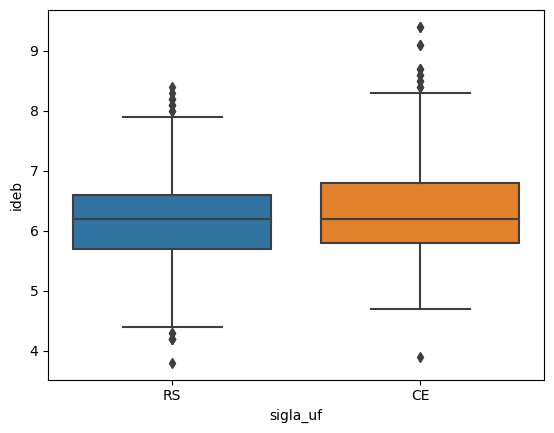

In [13]:
df_RS_CE = pd.concat([df_RS, df_CE])
sns.boxplot(x=df_RS_CE['sigla_uf'], y=df_RS_CE['ideb']);

### Atividade 6: Teste a hipótese de a média do IDEB para os anos de 2005 e 2019 serem iguais. Considere um nível de confiança de 95%

Dica: Crie dois dataframes auxiliares e selecione 300 linhas de cada um apenas (sem conter valores faltantes) para realizar o teste.

In [14]:
#Sample pega 300 amostras aleatórias, head pega as 300 primeiras, e tail pega as 300 ultimas
df2005ideb = df_sem_nulos[df_sem_nulos['ano'] == 2005].head(300)
df2019ideb = df_sem_nulos[df_sem_nulos['ano'] == 2019].head(300)
ttest_rel(df2005ideb['ideb'], df2019ideb['ideb'], alternative='two-sided', keepdims=False)

TtestResult(statistic=-163.87518962388705, pvalue=8.329734374233758e-295, df=299)

Como o p-valor é menor que 0,05, podemos rejeitar a hipótese nula, isto é, podemos afirmar com 95% de confiança que a média do IDEB para os anos de 2005 e 2019, não são iguais.

### Atividade 7: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB para os dois anos.

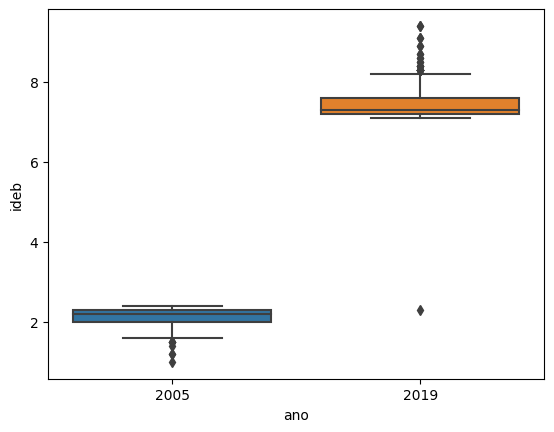

In [15]:
df_2005_2019 = pd.concat([df2005ideb, df2019ideb])
sns.boxplot(x=df_2005_2019['ano'], y=df_2005_2019['ideb']);

# Análise de Variância (ANOVA) One-Way

### Atividade 8: Vamos comparar a média do IDEB para os três estados da região sul, em 2019, para ver se estas médias podem ser consideradas iguais. Considere um nível de confiança de 95%.

Dica: Crie três dataframes auxiliares, um para cada estado.

In [16]:
df_RS1 = df_sem_nulos[(df_sem_nulos['ano'] == 2019) & (df_sem_nulos['sigla_uf'] == 'RS')]
df_SC = df_sem_nulos[(df_sem_nulos['ano'] == 2019) & (df_sem_nulos['sigla_uf'] == 'SC')]
df_PR = df_sem_nulos[(df_sem_nulos['ano'] == 2019) & (df_sem_nulos['sigla_uf'] == 'PR')]

In [17]:
f_oneway(df_RS1['ideb'],
         df_SC['ideb'],
         df_PR['ideb'])

F_onewayResult(statistic=27.712354138245196, pvalue=1.2331589284254783e-12)

Como o p-valor é menor que o nivel de significancia, podemos rejeitar a hipotese nula, podemos considerar que a média é diferente

::### Atividade 9: Faça um boxplot para entender melhor o que está acontecendo com os valores do IDEB para os três estados.

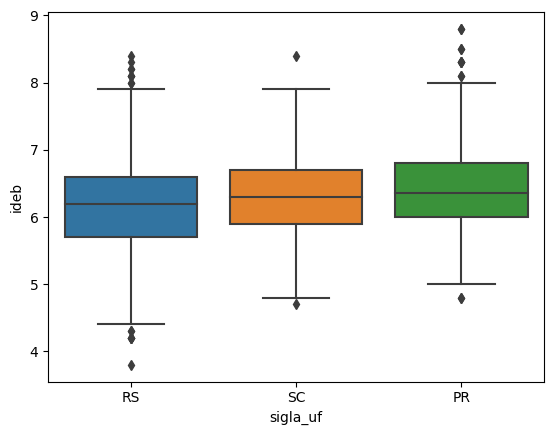

In [18]:
import seaborn as sns
df_ideb_sul = pd.concat([df_RS1, df_SC, df_PR])

sns.boxplot(x=df_ideb_sul['sigla_uf'], y=df_ideb_sul['ideb']);

### Atividade 10: Faça um teste Post-hoc para verificar se de fato é o estado de Santa Catarina tem média diferente dos demais estados.

> Bloco com recuo



In [19]:
print(pairwise_tukeyhsd(endog = df_ideb_sul['ideb'],
                  groups = df_ideb_sul['sigla_uf'],
                  alpha = 0.05)
)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    PR     RS  -0.2294    0.0  -0.302 -0.1568   True
    PR     SC  -0.1123 0.0035 -0.1936  -0.031   True
    RS     SC   0.1171 0.0009  0.0414  0.1928   True
----------------------------------------------------
